### <span style="color:green;">**Descrição da Base de Dados "Mall Customers"**</span>

A base de dados "Mall Customers" contém informações demográficas e comportamentais de clientes de um shopping. Este conjunto de dados é amplamente utilizado para análises de segmentação de clientes e inclui as seguintes colunas:

- **CustomerID**: Identificação única do cliente.
- **Gender**: Gênero do cliente (Masculino/Feminino).
- **Age**: Idade do cliente.
- **Annual Income (k$)**: Renda anual do cliente em milhares de dólares.
- **Spending Score (1-100)**: Pontuação de gastos do cliente atribuída pelo shopping, com base em comportamento e hábitos de compra.

#### Descrição do Trabalho

Neste projeto, usaremos a base de dados "Mall Customers" para explorar técnicas de redução de dimensionalidade e clustering. Aqui estão os passos que seguiremos:

1. **Preparação dos Dados**:
   - Carregar e visualizar a base de dados.
   - Limpar e padronizar os dados para garantir consistência e qualidade.

2. **Redução de Dimensionalidade com PCA**:
   - Aplicar Análise de Componentes Principais (PCA) para reduzir a dimensionalidade dos dados, facilitando a visualização e análise.

3. **Clustering com K-Means**:
   - Utilizar o algoritmo K-Means para agrupar os clientes em clusters com base em suas características demográficas e comportamentais.
   - Determinar o número ideal de clusters usando o método do cotovelo (Elbow Method).

4. **Visualização e Interpretação dos Resultados**:
   - Visualizar os clusters formados após a aplicação do K-Means e do PCA.
   - Interpretar os resultados e identificar padrões e insights sobre os diferentes segmentos de clientes.

5. **Aplicações Práticas**:
   - Explorar possíveis aplicações práticas dos resultados de clustering, como campanhas de marketing direcionadas e melhoria da experiência do cliente.

Este projeto permitirá que você aplique técnicas importantes de aprendizado de máquina, como PCA e K-Means, enquanto explora um conjunto de dados real e relevante. Vamos começar a jornada de análise e segmentação de clientes!


Link para a base de dados no Kaggle: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data

### **<span style="color:green">IMPORTS E CONFIGURAÇÕES</span>**

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

### **<span style="color:green">FUNÇÕES DE PROCESSAMENTO DE DADOS</span>**

In [3]:
CAMINHO_BASE_MALL_CUSTOMERS = "https://raw.githubusercontent.com/claytonsilva007/IDP/refs/heads/main/ml-01/dados/mall_customer/mall_customers.csv"

In [4]:
def carregar_dados(path: str):
  dados = pd.read_csv(path)
  return dados

In [5]:
def obter_treino_e_teste(df: pd.DataFrame, perc_treino: float = 0.8):
    treino, teste = train_test_split(df, train_size=perc_treino ,random_state=42)
    return treino, teste  

In [6]:
def transformar_sex_em_inteiro(df: pd.DataFrame):
    df.Gender = df.Gender.map({'Male': 0, 'Female': 1})
    return df

### **<span style="color:green">OBTENHA E TRANSFORME OS DADOS</span>**

Carregar os dados dos clientes do shopping e transforme a coluna Gender de texto para número.

In [7]:
df = carregar_dados(path=CAMINHO_BASE_MALL_CUSTOMERS)
df = transformar_sex_em_inteiro(df=df)
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


Sempre verifique se existem dados nulos e os tipos dos dados das colunas do dataframe com a função `info()`

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     200 non-null    int64
 1   Gender         200 non-null    int64
 2   Age            200 non-null    int64
 3   AnnualIncome   200 non-null    int64
 4   SpendingScore  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


Utilize o comando `describe()` para visualizar estatísticas básicas do dataframe. Para o nosso problema atual, a escala dos números tem grande importância.

In [9]:
df.describe()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


### **<span style="color:green">PADRONIZE OS DADOS</span>**

Crie um array chamado **features** contendo todas as características mais importantes. Por ora, **remova a coluna CustomerID**.

In [ ]:
features = df[['Age', 'AnnualIncome', 'SpendingScore']]

Utilize a classe `StandardScaler()` para transformar os valores das variáveis em uma escala padrão. 

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

---
Três motivos para padronizar dados, especialmente quando estivermos trabalhando com PCA e Clusters.

**Eliminação de Unidades e Escalas Diferentes**: Dados não padronizados podem ter diferentes unidades e escalas, o que pode influenciar desproporcionalmente a análise. Por exemplo, imagine que você tem dados sobre altura (em metros) e peso (em quilos). Sem padronização, o PCA pode ser mais influenciado pelos pesos simplesmente porque os valores são numericamente maiores que as alturas.

**Comparabilidade dos Componentes**: A padronização permite que cada variável contribua igualmente para a análise. Isto é especialmente importante em PCA, onde estamos interessados em entender a variação relativa entre as variáveis.

**Convergência e Eficiência Computacional**: Em muitos casos, padronizar os dados pode levar a uma convergência mais rápida e eficiente dos algoritmos de PCA.

---

### **<span style="color:green">REDUÇÃO DE DIMENSIONALIDADE</span>**

Reduza a dimensionalidade do dataframe para 2 componentes principais.

In [12]:
# Reduzir a dimensionalidade para 2 componentes principais
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

---
O que acontece quando executamos `pca.fit_transform()`?

**Componentes Principais** (n_componentes=2): Eles são **combinações lineares** das variáveis originais que capturam a maior parte da variação nos dados. Em nosso caso, reduzimos a dimensionalidade para 2 componentes principais, ou seja, estamos tentando representar os dados originais em um espaço bidimensional.

**Variação Explicada**: Cada componente principal explica uma certa quantidade da variância nos dados originais.  pode acessar isso com o atributo `explained_variance_ratio_` do objeto pca para entender a proporção da variância total capturada por cada componente principal.


---

Visualize a variância explicada utilizando o atributo `explained_variance_ratio_`. 

Na prática, o que desejamos ver é o percentual das informações originais representados em apenas 2 componentes.

In [13]:
pca.explained_variance_ratio_

array([0.33690046, 0.26230645])

Visualize o conteúdo da variável principal_components. Utilize o slice do Python para visualizar apenas os 5 primeiros registros.

Esses valores representam a contribuição das variáveis originais para cada novo componente principal. O PCA reorienta o espaço dos dados de forma que as novas direções (componentes principais) maximizem a variação dos dados.

In [14]:
principal_components[:5]

array([[-0.40638272, -0.52071363],
       [-1.42767287, -0.3673102 ],
       [ 0.05076057, -1.89406774],
       [-1.6945131 , -1.63190805],
       [-0.31310838, -1.81048272]])

Criar um DataFrame chamado **df_pca** com os componentes principais que acabamos de calcular. 

O Pandas e Sklearn mantém pareada a estrutura de índices ao longo de suas operações, o que facilita a atribuição/junção entre o dataframe original (df) e o dataframe de componentes principais (df_pca) de forma simplificada.

In [15]:
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['CustomerID'] = df['CustomerID']

In [16]:
df_pca

,PC1,PC2,CustomerID
0,-0.406383,-0.520714,1
1,-1.427673,-0.367310,2
2,0.050761,-1.894068,3
3,-1.694513,-1.631908,4
4,-0.313108,-1.810483,5
...,...,...,...
195,-1.179572,1.324568,196
196,0.672751,1.221061,197
197,-0.723719,2.765010,198
198,0.767096,2.861930,199


Utilize a função `plot()` do pandas para gerar um gráfico de dispersão (scatter) dos componentes PC1 e PC2.

<Axes: xlabel='PC1', ylabel='PC2'>

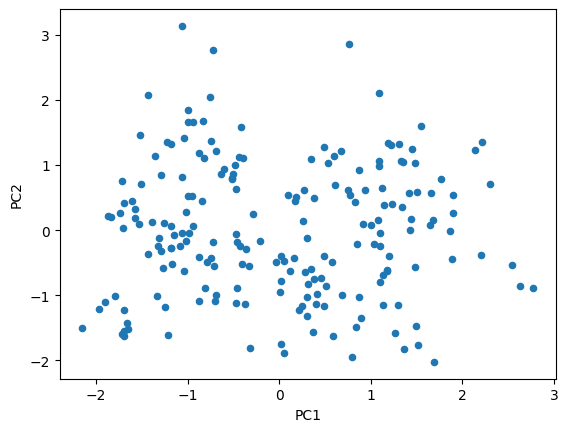

In [17]:
df_pca.plot(kind='scatter', x='PC1', y='PC2')

---
<span style='color: green;'>**Por que eu devo utilizar o PCA?**</span>

**Redução de Dimensionalidade**

- Sozinho: Facilitar a visualização e a interpretação dos dados. Isso é útil quando você tem um grande número de variáveis e quer entender as principais tendências e padrões.

- Com Outros Algoritmos: A redução de dimensionalidade pode melhorar a eficiência e a performance de outros algoritmos de machine learning. Algoritmos de clustering (como K-Means) ou classificadores (como SVM) podem se beneficiar de dados com menos dimensões, tornando o treinamento mais rápido e potencialmente mais preciso.

**Remoção de Ruído**:

- Sozinho: O PCA pode ajudar a eliminar variáveis redundantes e ruído nos dados, concentrando-se nas principais fontes de variabilidade. 

- Com Outros Algoritmos: Ao remover ruído e redundância, o PCA pode melhorar a qualidade dos dados usados em outros modelos de machine learning. 

**Visualização de Dados**:

- Sozinho: O PCA é frequentemente usado para criar visualizações em 2D ou 3D de conjuntos de dados de alta dimensão. Essas visualizações podem revelar padrões, agrupamentos e outliers que não são visíveis em espaços de alta dimensão.

- Com Outros Algoritmos: Visualizar os dados em um espaço de menor dimensão pode ajudar a entender e explicar os resultados de outros algoritmos de machine learning.

---

### **<span style="color:green">K-MEANS E PCA</span>**

#### 1. Selecione a quantidade de clusters utilizando o Método do Cotovelo (Elbow Method)

**Objetivo do Elbow Plot** 

O objetivo do Elbow Plot é ajudar a determinar o número ideal de clusters para usar no algoritmo K-Means. Ele faz isso mostrando como a inércia muda à medida que você aumenta o número de clusters.

**Inércia e Clusters**:

- Inércia: É a soma das distâncias quadradas entre cada ponto de dados e o centroide do seu respectivo cluster. Em termos simples, é uma medida de quão bem os pontos de dados estão agrupados.

- Número de Clusters: À medida que você aumenta o número de clusters, a inércia tende a diminuir porque os pontos de dados estão mais próximos dos centroides dos clusters.

Inicie o processo criando duas variáveis, **num_clusters** e **inertia_list**, onde k será a quantidade de clustes testados e inertia_list a variável responsável por armazenar a inertia dos clusters.

In [20]:
inertia_list = []
num_clusters = range(1, 10)

Agora, faça o seguinte:
- Itere a variável `num_clusters`.
- Para cada iteração, Instancie um Objeto KMeans preencendo o atributo `n_clusters=k`, onde k é a quantidade de clusters da iteração.
- Utilize o método fit para treinar o modelo. Para o KMeans, só preisamos passar o "X" (`principal_components`).
- adicione a inertia à variável `inertia_list`.  

In [22]:
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(principal_components)
    inertia_list.append(kmeans.inertia_)

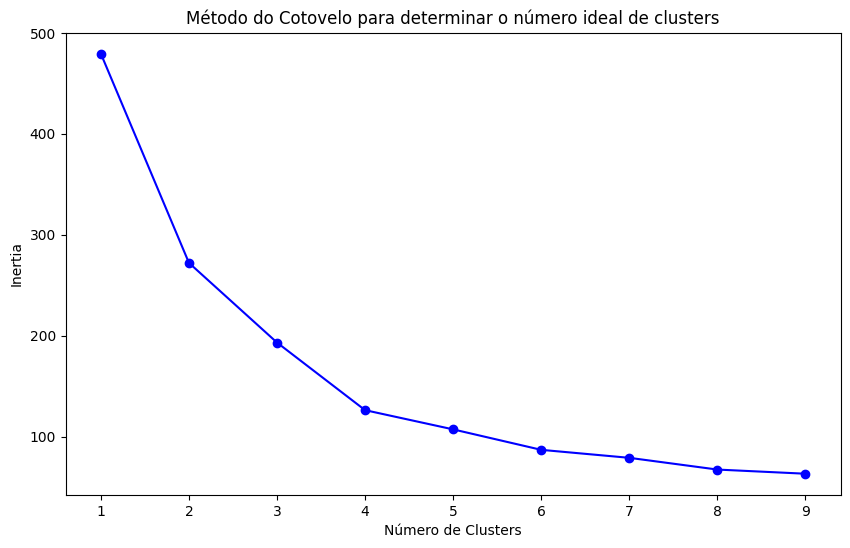

In [24]:
# Plotar o gráfico do Cotovelo
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, inertia_list, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Método do Cotovelo para determinar o número ideal de clusters')
plt.show()


#### 2. Aplicar K-Means com o número ideal de clusters

Instancie um objeto chamado kmeans

In [38]:
kmeans = KMeans(n_clusters=3, random_state=42)

Utilize o método **`fit_predict`** criar os clusters. Lembre-se de utilizar o DataFrame `principal_components`.

In [39]:
clusters = kmeans.fit_predict(principal_components)

Adicionar os clusters ao DataFrame utilizando `df_pca['Cluster']`.

In [41]:
df_pca['Cluster'] = clusters

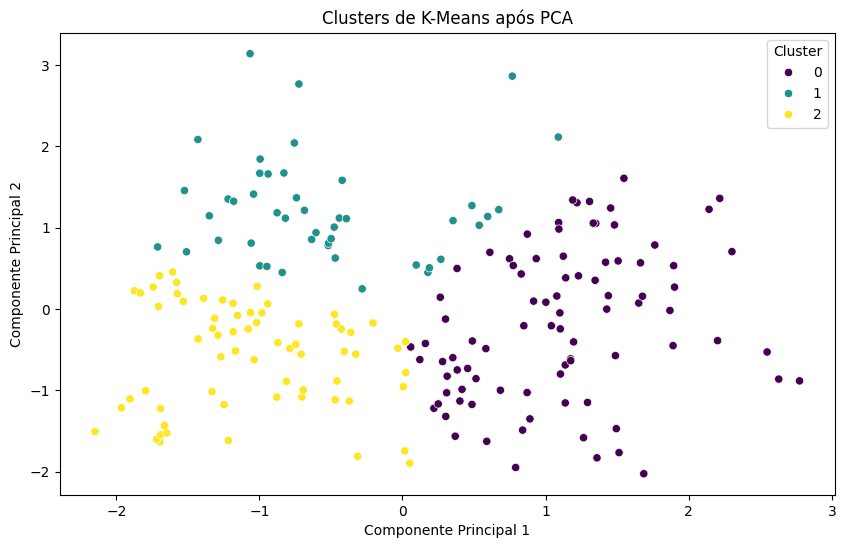

In [47]:
# Plotar os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('Clusters de K-Means após PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


#### 3. Adicionar as características originais ao DataFrame de PCA

In [43]:
df_pca['Age'] = df['Age']
df_pca['AnnualIncome'] = df['AnnualIncome']
df_pca['SpendingScore'] = df['SpendingScore']

#### 4. Calcular estatísticas descritivas para cada cluster

In [46]:
cluster_stats = df_pca.groupby('Cluster').agg({
    'Age': ['min', 'max', 'mean'],
    'AnnualIncome': ['min', 'max', 'mean'],
    'SpendingScore': ['min', 'max', 'mean']
})

cluster_stats

Age                AnnualIncome                 SpendingScore      \
        min max       mean          min  max       mean           min max   
Cluster                                                                     
0        34  70  51.666667           18  120  57.252874             1  60   
1        18  45  30.282609           42  137  83.630435             5  97   
2        18  45  28.089552           15   88  49.014925             6  99   

                    
              mean  
Cluster             
0        33.436782  
1        61.021739  
2        64.537313

Forma alternativa de visualizar os dados dos clusters

In [48]:
# Visualizar as estatísticas descritivas
for cluster in cluster_stats.index:
    print(f"Cluster {cluster}:")
    print(f"Idade: {cluster_stats.loc[cluster, ('Age', 'min')]} - {cluster_stats.loc[cluster, ('Age', 'max')]}")
    print(f"Renda Anual: {cluster_stats.loc[cluster, ('AnnualIncome', 'min')]}k$ - {cluster_stats.loc[cluster, ('AnnualIncome', 'max')]}k$")
    print(f"Pontuação de Gastos: {cluster_stats.loc[cluster, ('SpendingScore', 'min')]} - {cluster_stats.loc[cluster, ('SpendingScore', 'max')]}")
    print(f"Média de Idade: {cluster_stats.loc[cluster, ('Age', 'mean')]:.2f}")
    print(f"Média de Renda Anual: {cluster_stats.loc[cluster, ('AnnualIncome', 'mean')]:.2f}k$")
    print(f"Média de Pontuação de Gastos: {cluster_stats.loc[cluster, ('SpendingScore', 'mean')]:.2f}")
    print()


Cluster 0:
Idade: 34 - 70
Renda Anual: 18k$ - 120k$
Pontuação de Gastos: 1 - 60
Média de Idade: 51.67
Média de Renda Anual: 57.25k$
Média de Pontuação de Gastos: 33.44

Cluster 1:
Idade: 18 - 45
Renda Anual: 42k$ - 137k$
Pontuação de Gastos: 5 - 97
Média de Idade: 30.28
Média de Renda Anual: 83.63k$
Média de Pontuação de Gastos: 61.02

Cluster 2:
Idade: 18 - 45
Renda Anual: 15k$ - 88k$
Pontuação de Gastos: 6 - 99
Média de Idade: 28.09
Média de Renda Anual: 49.01k$
Média de Pontuação de Gastos: 64.54

